In [9]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

PRIOR 1

In [10]:
d = pd.read_csv("airline_data.csv", header=0)
model_ppc=CmdStanModel(stan_file='lab5_prior.stan')
fatal_incidents_known = d["Fatal accidents"]

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


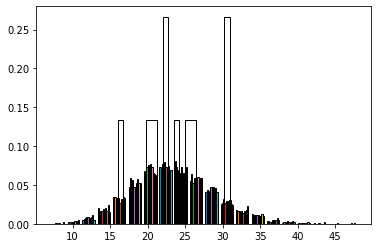

In [11]:
R = 1000
miles_ = d["Miles flown [100 mln miles]"].tolist()

sim=model_ppc.sample(data=dict(N=len(d),
                                   miles=miles_), 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

fatal_sim_ = sim.stan_variable("fatal_sim")
alpha_ = sim.stan_variable("alpha")
beta_ = sim.stan_variable("beta")
tmp_AB = sim.stan_variable("tmp_AB")


plt.hist(fatal_sim_, bins=20,edgecolor='k',density=True)
plt.hist(fatal_incidents_known, bins=20,histtype='step',color='black',density=True)
plt.show()

In [12]:
print(fatal_sim_.mean())
print(fatal_incidents_known.mean())

23.4827
23.8


POST V1
<br>real alpha = normal_rng(3.15, 0.025);
<br>real beta = normal_rng(0, 0.000015);

In [13]:
d = pd.read_csv("airline_data.csv", header=0)
model_ppc=CmdStanModel(stan_file='lab5_post_1.stan')
fatal_incidents_known = d["Fatal accidents"]
miles_ = d["Miles flown [100 mln miles]"].tolist()

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)







chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


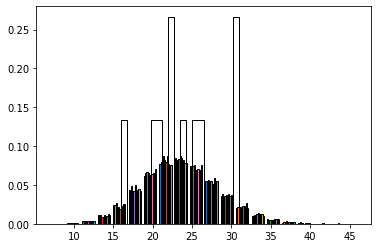

In [14]:
fit=model_ppc.sample(data=dict(N=len(d),
                                   miles=miles_,fatal=fatal_incidents_known), 
                     seed=29042020)

fatal_ = fit.stan_variable("fatal_sim")
alpha_ = fit.stan_variable("alpha")
beta_ = fit.stan_variable("beta")


plt.hist(fatal_, bins=20,edgecolor='k',density=True)
plt.hist(fatal_incidents_known, bins=20,histtype='step',color='black',density=True)
plt.show()

ZD 2

In [15]:
d = pd.read_csv("airline_data.csv", header=0)
model_ppc=CmdStanModel(stan_file='lab5_post_2.stan')
fatal_incidents_known = d["Fatal accidents"]
miles_ = d["Miles flown [100 mln miles]"].tolist()

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status

chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)



chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


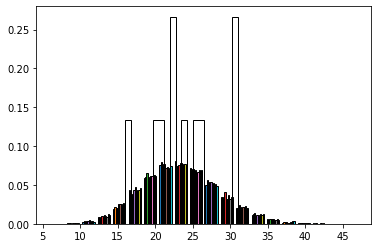

In [16]:
fit=model_ppc.sample(data=dict(N=len(d),
                                   miles=miles_,fatal=fatal_incidents_known),
                                                        chains=3, 

                     seed=29042020)

fatal_ = fit.stan_variable("fatal_sim")
alpha_ = fit.stan_variable("alpha")
beta_ = fit.stan_variable("beta")


plt.hist(fatal_, bins=20,edgecolor='k',density=True)
plt.hist(fatal_incidents_known, bins=20,histtype='step',color='black',density=True)
plt.show()